In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# leer el archivo en el pc
car ='C:/Users/brak3/OneDrive/Escritorio/Iluma/carcasses.xlsx'
fin ='C:/Users/brak3/OneDrive/Escritorio/Iluma/finishers.xlsx'
nec ='C:/Users/brak3/OneDrive/Escritorio/Iluma/necropsies.xlsx'

In [2]:
#Definir los DataFrame que vamos a utilizar
dfcar = pd.read_excel(car)
dffin = pd.read_excel(fin)
dfnec = pd.read_excel(nec)

In [3]:
# chequeamos cuantos son los atributos y cuantos registros de cada DF
print (dfcar.shape)
print (dffin.shape)
print (dfnec.shape)


(1818, 7)
(1766, 16)
(20346, 6)


In [4]:
# Se hace chequeo de cuantos registros en los 3 DF tiene entradas nulas. 
# Como no tenemos valores 'NaN' o '?', proseguimos con el analisis
missing_datacar = dfcar.isnull()
for column in missing_datacar.columns.values.tolist():
    print(column)
    print (missing_datacar[column].value_counts())
    print("")
    
missing_datafin = dffin.isnull()
for column in missing_datafin.columns.values.tolist():
    print(column)
    print (missing_datafin[column].value_counts())
    print("")
    
missing_datanec = dfnec.isnull()
for column in missing_datanec.columns.values.tolist():
    print(column)
    print (missing_datanec[column].value_counts())
    print("")

fecha
False    1818
Name: fecha, dtype: int64

granja
False    1818
Name: granja, dtype: int64

magroPor
False    1818
Name: magroPor, dtype: int64

pesoCanal
False    1818
Name: pesoCanal, dtype: int64

grasaDorsalMm
False    1818
Name: grasaDorsalMm, dtype: int64

numeroCanales
False    1818
Name: numeroCanales, dtype: int64

pesoInicialSupuesto
False    1818
Name: pesoInicialSupuesto, dtype: int64

fechaSalida
False    1766
Name: fechaSalida, dtype: int64

idLote
False    1766
Name: idLote, dtype: int64

fechaInicio
False    1766
Name: fechaInicio, dtype: int64

gananciaAnimalDiaG
False    1766
Name: gananciaAnimalDiaG, dtype: int64

gananciaAnimalDiaKg
False    1766
Name: gananciaAnimalDiaKg, dtype: int64

granja
False    1766
Name: granja, dtype: int64

granjaDeOrigen
False    1766
Name: granjaDeOrigen, dtype: int64

mortalidadPor
False    1766
Name: mortalidadPor, dtype: int64

noInicialAnimales
False    1766
Name: noInicialAnimales, dtype: int64

pesoPromedioFinalKg
False    176

Comparamos la cantidad de informacion obetenida luego de unir los DF de acuerdo a ciertas filas que comparten. 
Podremos ver que la disminucion es considerable. 

In [5]:
# 1. Unir Finishers con carcasses con puntos comun fecha y granja
dfmerge1 = dffin.merge(dfcar,left_on=["fechaSalida", "granjaDeOrigen"],right_on = ["fecha", "granja"])
dfmerge1.shape
print ("el numero de registros que concuerdan es de:", dfmerge1.shape ,
       "Se nota una reduccion de las entradas de hasta el 80%")

el numero de registros que concuerdan es de: (158, 23) Se nota una reduccion de las entradas de hasta el 80%


<b>Se basara la union de los DF en las siguientes afirmaciones dadas en la descripción del problema.<b>
    
    . Es válido asumir que los cerdos llegan a la planta de procesamiento el mismo día que salen de la granja.
    . La fecha que se reporta en los registros de operaciones es la fecha promedio de salida de los animales (finishers). 
    . En cambio, los registros de procesamiento sí reflejan la fecha exacta en la que los cerdos llegaron a la planta (Cascasses).


In [6]:
# Unir Finishers con Carcasses con la suposicion echa al inicio, fecha de salia en Finishers con la fecha de de Carcasses
dfmerge2 = dffin.merge(dfcar,left_on="fechaSalida",right_on = "fecha")
dfmerge2.shape
print ("el numero de registros que coinciden es de:" , dfmerge2.shape)
print (len(dfmerge2.index), "equivale al 67.9% de los registros, haciendolo la mejor base para realizar el analisis")

el numero de registros que coinciden es de: (1199, 23)
1199 equivale al 67.9% de los registros, haciendolo la mejor base para realizar el analisis


In [7]:
# 1 (Afirmación David)
#Se unen en un solo DF las variables que David creo que influiran y buscamos la posible correlación
dfdavid = dfmerge2 [["Edad", "magroPor", "numeroCanales"]]
print (dfdavid.corr())
print ("Los valores de correlacion son bastante bajos, lo que no indica una relación directa o por lo menos linearentre las variables")


                   Edad  magroPor  numeroCanales
Edad           1.000000 -0.224438       0.060602
magroPor      -0.224438  1.000000      -0.130927
numeroCanales  0.060602 -0.130927       1.000000
Los valores de correlacion son bastante bajos, lo que no indica una relación directa o por lo menos linearentre las variables


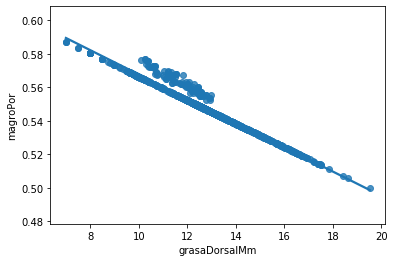

In [8]:
sns.regplot(x="grasaDorsalMm", y="magroPor", data=dfmerge2)

                     gananciaAnimalDiaKg  consumoAnimalDiaKg
gananciaAnimalDiaKg             1.000000            0.705841
consumoAnimalDiaKg              0.705841            1.000000


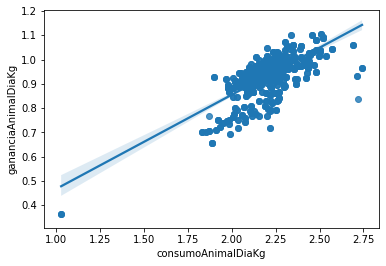

In [9]:
# 2 (Afirmación Alejandro)
# Creamos un DF alterno que nos permita analizar lo que dice Alejandro
dfalejandro = dfmerge2 [["gananciaAnimalDiaKg", "consumoAnimalDiaKg"]]
print (dfalejandro.corr())
sns.regplot(x="consumoAnimalDiaKg", y="gananciaAnimalDiaKg", data=dfalejandro)

In [10]:
# 3 (Afirmacion Alejandro)
# Se evalua la relacion con correlacion de Pearson, los coeficientes de Pearson nos lo aclaran de inmediato

from scipy import stats

pearson_coef, p_value = stats.pearsonr(dfalejandro['consumoAnimalDiaKg'], dfalejandro['gananciaAnimalDiaKg'])
print("Es coeficiente de correlacion de Pearson es", pearson_coef, " con un valor de P igua a P =", p_value) 

print ("al ser un valor de P menor de 0.001 la relacion es estaditicamente significante apesar que la relacion lineal no sea muy fuerte")

Es coeficiente de correlacion de Pearson es 0.7058408710798179  con un valor de P igua a P = 1.8856367965511896e-181
al ser un valor de P menor de 0.001 la relacion es estaditicamente significante apesar que la relacion lineal no sea muy fuerte


In [11]:
# 3 evaluar la relacion lineal encontrada entre consumo animal y ganancia, para encontrar el promedio de grasa dorsal en Mm

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
lm.fit(dfalejandro, dfmerge2['grasaDorsalMm'])
print (lm.intercept_)
print (lm.coef_)

7.45627854160562
[15.40615362 -4.1290577 ]


Los coeficientes de Pearson son sugieren una fuerte correlacion, podria aumentar con la calidad de los datos. La relacion hallada al ser lineal no poseera variables de mayor orden a uno. Dependera de "consumo al dia" y "ganancia" arrojando lo siguiente:

<b>Grasa dorsal (Mm) = 7.45 + 15.40(Consumo al dia) - 4.12(Ganancia al dia)]<B>

In [12]:
# 4 (Afirmacion Miguel)
# Miguel Afirma que debemos centrarnos en producir la mayor cantidad de Kg de carne magra por cerdo
# Unimos en un nuevo DF las variables que tienen correlacion con carne magra
dfmiguel = dfmerge2 [["%Ganancia", "Edad" , "pesoCanal", "grasaDorsalMm", "consumoAnimalDiaKg" , "magroPor", 
                      "gananciaAnimalDiaKg"]]

In [13]:
# 4.4 miguel 
#Para tener una mejor prediccion de porcentage magro, nos limitamos a evaluarla con las variables dependientes, %ganancia
# Edad, Peso y grasa dorsal. Puede que no nos lleven a una expresion con error BAJO, pero puede acercarnos a los valores
# de Magro durante los dias en los que los cerdos muestran la conversion alimenticia mas alta
dfmiguel2 = dfmiguel[dfmiguel.Edad.isin([100,101,102,103,104,105,106,107])]
print ( dfmiguel2.head())
print ("EL dataFrame Resultante tiene las siguientes dimensiones" , dfmiguel2.shape)

    %Ganancia  Edad   pesoCanal  grasaDorsalMm  consumoAnimalDiaKg  magroPor  \
17  41.427650   104  107.062000      11.370000               2.264  0.556710   
18  41.427650   104  109.621345      11.707602               2.264  0.554347   
19  41.427650   104  102.559845      10.992278               2.264  0.559354   
20  41.427650   104   94.818729      10.802676               2.264  0.560681   
21  38.204964   102  102.419828      11.287356               2.478  0.557289   

    gananciaAnimalDiaKg  
17             0.937922  
18             0.937922  
19             0.937922  
20             0.937922  
21             0.946719  
EL dataFrame Resultante tiene las siguientes dimensiones (910, 7)


In [14]:
# 4 (Miguel)
# Creamos un Df con las variables correlacionas con Magro
miguelev = dfmiguel2[["pesoCanal","Edad","%Ganancia","grasaDorsalMm","consumoAnimalDiaKg","gananciaAnimalDiaKg"]]
# Con magroev se evaluara la funcion predictiva
magroev = dfmiguel2["magroPor"]

In [15]:
#  4 (Miguel) analisis lineal para magro con respecto a las otras variables 
lm2 = LinearRegression()
lm2
lm2.fit(miguelev,dfmiguel2["magroPor"])
print (lm2.intercept_)
print (lm2.coef_)

0.5752569671106367
[ 6.40169940e-05 -4.19195623e-05  1.75516233e-03 -7.49875939e-03
  2.86414797e-02 -7.66307518e-02]


In [16]:
# 4 (miguel) Funcion predictiva
Y_hat = lm2.predict(miguelev)

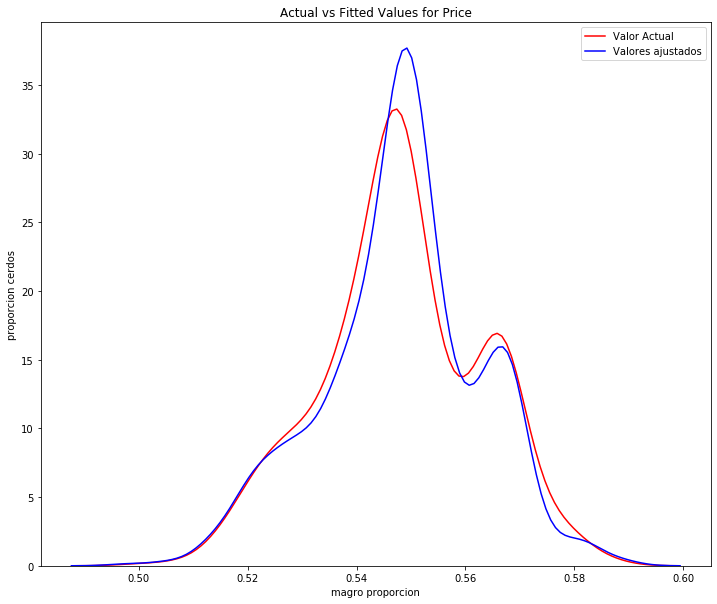

In [17]:
# 4 (Miguel)
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dfmiguel2['magroPor'], hist=False, color="r", label="Valor Actual")
sns.distplot(Y_hat, hist=False, color="b", label="Valores ajustados" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('magro proporcion')
plt.ylabel('proporcion cerdos')

plt.show()
plt.close()

Podemos ver por la grafica que la mejor prediccion la proporcion magra del canal "magroPor" que podemos obtener (curva azul) es con una relacion de las variables que nos mostraron correlacion con esta, resultando asi en la siguiente ecuacion:

<b>magroPor = 0.6197 + 4.5607e-05(pesoCanal) - 9.7098e-06(Edad) + 4.4438e-04(%Ganancia) - 7.3102e-03(grasaDorsalMm) + 7.9262e-03(consumoAnimalDiaKg) - 2.0427e-02(gananciaAnimalDiaKg)<b>
    
Asi como asegura Guillermo, al tener mas carne magra (Qué es la que mas se vende y a mejor precio) obtendremos mayores ingresos. Los costos fijos y variables se diluyen. Pero no se debe ignorar el hecho que los otros indicadores productivos SI influyen en el resultado final de la canal a vender. 

#Jaime y miguel
Vamos a corroborar con ambas tablas (Finishers y Carcasses) si los pesos que reportan ambas personas coinciden.
Las unimos por medio de "fechaSalida" y "pesoCanalSupuesto" en finishers y en Carcasses con "fecha" y "pesoCanal"
Asumiendo que el 14% del perso en pie del cerdo se pierde en el sacrificio 
<b>pesoCanalSupuesto = pesoPromedioFinalKg * 0.86<B>

In [18]:
#Se verifica la cantadidad de registros que poseemos entre el peso final en pie del cerdo comprado
# con el peso de la canal
dfmergefincar = dffin.merge(dfcar,left_on=["fechaSalida", "pesoCanalSupuesto"],right_on = ["fecha", "pesoCanal"])
dfmergefincar.shape
print ("el numero de registros que concuerdan es de:", dfmergefincar.shape)

el numero de registros que concuerdan es de: (0, 23)


In [19]:
%%capture
! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [20]:
#Solo usamos la parte numerica del DF para no entrar en valores que no pueden ser calculados por la variables categoricas
dfmerge3=dfmerge2._get_numeric_data()
dfmerge3.head()

,idLote,gananciaAnimalDiaG,gananciaAnimalDiaKg,mortalidadPor,noInicialAnimales,pesoPromedioFinalKg,pesoPromedioInicialKg,consumoAnimalDiaKg,%Ganancia,Edad,noFinalAnimales,pesoCanalSupuesto,magroPor,pesoCanal,grasaDorsalMm,numeroCanales,pesoInicialSupuesto
0,0,932.155,0.932155,0.221,1180,125.532,33.248,2.711,34.384176,99,919.220,107.95752,0.557641,106.503233,11.237069,464,123.840968
1,0,932.155,0.932155,0.221,1180,125.532,33.248,2.711,34.384176,99,919.220,107.95752,0.554820,113.699000,11.640000,100,132.208139
2,1,919.948,0.919948,0.029,418,135.937,33.823,2.361,38.964337,111,405.878,116.90582,0.556436,108.107025,11.409091,242,125.705843
3,1,919.948,0.919948,0.029,418,135.937,33.823,2.361,38.964337,111,405.878,116.90582,0.554871,108.341593,11.632743,226,125.978596
4,1,919.948,0.919948,0.029,418,135.937,33.823,2.361,38.964337,111,405.878,116.90582,0.549150,115.842000,12.450000,100,134.700000


In [21]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('magroPor')
    plt.ylabel('proporcion de cerdos')

    plt.show()
    plt.close()

In [22]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #datos de entrenamiento 
    #datos para evaluar
   
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Funcion predictiva')
    plt.ylim([-10000, 60000])
    plt.ylabel('MagroPor')
    plt.legend()

In [23]:
y_data = dfmerge3['magroPor']
# Eliminamos la columna Magro ya que es el valor que queremos calcular
x_data=dfmerge3.drop('magroPor',axis=1)

In [24]:
# Seleccionamos al azar porcentajes de los datos para entrenar y probar la ecuacion de prediccion que se averiguo en
# el enunciado de miguel
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("numero de registros para test :", x_test.shape[0])
print("numero de registros para entrenar:",x_train.shape[0])

numero de registros para test : 180
numero de registros para entrenar: 1019


In [25]:
lre=LinearRegression()
lre.fit(x_train[['grasaDorsalMm']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lre.score(x_test[['grasaDorsalMm']], y_test)
# El valor R^2 es mas cercano a 1 con lo que podemos
lre.score(x_train[['grasaDorsalMm']], y_train)

0.9674987303139181

Al poseer un correlacion buena, podremos usarlos como prediccion en nuestro modelo y modificarlo entrenando el mismo modelo

In [27]:
from sklearn.model_selection import cross_val_score
# se crea un objeto para hacer regresion y predecir magro con mas variables
lr = LinearRegression()
lr.fit(x_train[['grasaDorsalMm', '%Ganancia', 'consumoAnimalDiaKg', 'pesoCanal']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Se dividen los set de datos para entrenar la funcion de prediccion
# Usando el parte de entrenamiento haremos prediccion del valores de magroPor
yhat_train = lr.predict(x_train[['grasaDorsalMm', '%Ganancia', 'consumoAnimalDiaKg', 'pesoCanal']])
yhat_train[0:5]

array([0.56418512, 0.56559164, 0.54920015, 0.54756005, 0.54787546])

In [29]:
# Usaremos la parte de evaluacion para predecir valores de magroPor
yhat_test = lr.predict(x_test[['grasaDorsalMm', '%Ganancia', 'consumoAnimalDiaKg', 'pesoCanal']])
yhat_test[0:5]

array([0.55341399, 0.54805931, 0.53913932, 0.56287439, 0.54050144])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

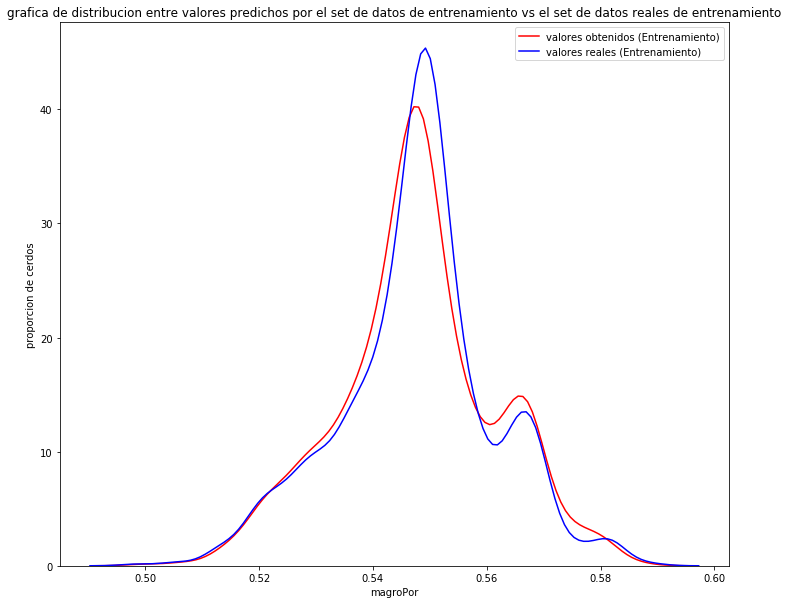

In [31]:
Title = 'grafica de distribucion entre valores predichos por el set de datos de entrenamiento vs el set de datos reales de entrenamiento'
DistributionPlot(y_train, yhat_train, "valores obtenidos (Entrenamiento)", "valores reales (Entrenamiento)", Title)

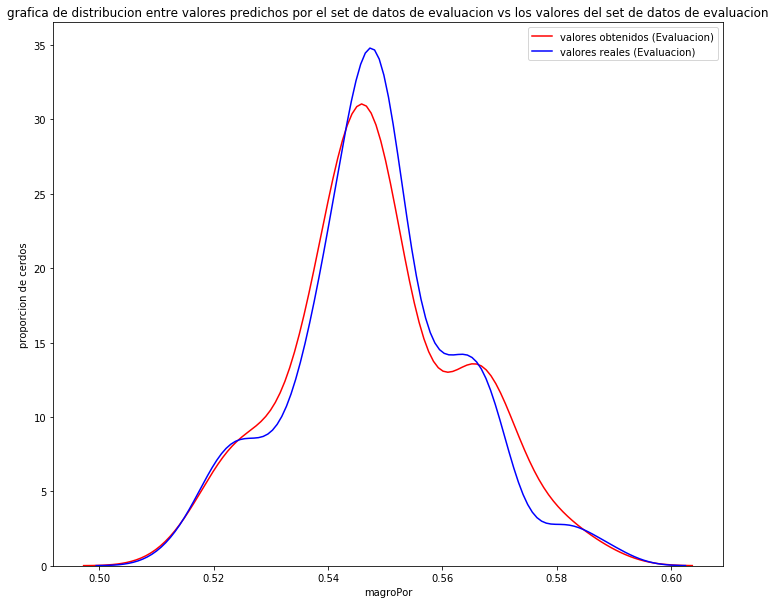

In [32]:
Title = 'grafica de distribucion entre valores predichos por el set de datos de evaluacion vs los valores del set de datos de evaluacion'
DistributionPlot(y_test, yhat_test, "valores obtenidos (Evaluacion)", "valores reales (Evaluacion)", Title)

Ya que ambos set de datos se comportan acordes a los valores reales, no es necesario buscar nuevos valores para evaluar la funcion de prediccion. Este modelo no ha tomado tanto ruido de datos que pueda que no sean tomados de la mejor manera.